In [16]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
train_data_cleaned_v2 = pd.read_csv('AG_train-test_v2.csv')

In [18]:
X = train_data_cleaned_v2.drop('Survived', axis = 1)
y = train_data_cleaned_v2['Survived']

In [19]:
X.drop('Unnamed: 0', axis = 1, inplace=True)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,0,0
1,1,1,38.0,1,0,0,1
2,3,1,26.0,0,0,0,0
3,1,1,35.0,1,0,0,0
4,3,0,35.0,0,0,0,0


In [20]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
from sklearn.model_selection import train_test_split

d = {}

for i in np.arange(1,100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    model.fit(X_train, y_train)
    #print(model.score(X_test,y_test))
    d.update({i:model.score(X_test,y_test)})


In [22]:
my_dict = d

key_max = max(my_dict.keys(), key=(lambda k: my_dict[k]))
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))

print('Maximum Value: ',my_dict[key_max])
print('Minimum Value: ',my_dict[key_min])

Maximum Value:  0.8305084745762712
Minimum Value:  0.7175141242937854


In [23]:
a = [key for key,values in d.items() if values == d[key_max]]

print (a)

[10, 53, 92, 97]


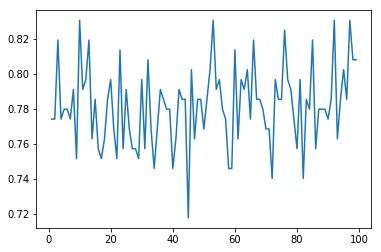

In [24]:
import matplotlib.pyplot as plt

plt.plot(my_dict.keys()  , my_dict.values())